## CAPTURANDO OS DADOS:

In [1]:
import pandas as pd

#pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 500)
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt

import glob

In [2]:
# files = glob.glob(r"C:\Users\firmi\Experimento com 50 veículos\pontos_subtrajetorias\*.csv")

files = glob.glob(r"D:\Atividades Finais - Mestrado\novos_usuarios\pontos\*.csv")

df_final = pd.DataFrame()
for f in files:
    plt = pd.read_csv(f, sep = ",")
    df_final = pd.concat([plt,df_final], ignore_index=False)
    
# Supondo que df seja o seu dataframe original
# df_origens = df_final[['VehId_x', 'Trip', 'Origens', 'grid_origem', 'lon_x', 'lat_x']]
# df_destinos = df_final[['VehId_x', 'Trip', 'Destinos', 'grid_destino', 'lon_y', 'lat_y']]
df_final

,Unnamed: 0,VehId,Trip,grid_origem,grid_destino,datetime_x,datetime_y,day_x,period_x,trip
0,0,2,1049_2018-03-21 05:58:56,64034,66940,2017-11-10 15:48:07,2017-11-12 05:47:27,Friday,Afternoon,1049
1,1,550,1366_2018-01-26 22:48:57,64034,47474,2018-01-13 04:38:17,2018-01-14 11:59:40,Saturday,Early morning,1366
2,2,560,247_2018-01-25 11:05:41,64034,78354,2018-05-09 00:42:08,2018-05-09 19:57:57,Wednesday,Early morning,247
3,3,560,327_2018-02-23 10:23:31,64034,74530,2018-06-30 03:30:36,2018-06-30 17:19:58,Saturday,Early morning,327
4,4,560,460_2018-03-28 08:59:59,64034,77928,2018-07-25 09:01:28,2018-07-25 20:12:49,Wednesday,Morning,460
...,...,...,...,...,...,...,...,...,...,...
1638,1638,431,1866_2018-07-02 21:41:45_2018-07-02 21:41:45,45015,66449,2018-03-16 11:35:58,2018-03-17 10:40:13,Friday,Morning,1866
1639,1639,431,769_2017-11-13 22:30:13_2017-11-13 22:30:13,40494,38844,2018-10-15 03:37:45,2018-10-15 06:10:32,Monday,Early morning,769
1640,1640,431,845_2017-11-29 17:33:36_2017-11-29 17:33:36,45002,75312,2018-10-21 12:28:38,2018-10-21 14:24:32,Sunday,Afternoon,845
1641,1641,431,846_2017-12-03 18:47:56_2017-12-03 18:47:56,31681,67289,2018-10-21 17:56:10,2018-10-21 19:50:45,Sunday,Afternoon,846


In [3]:
#files = glob.glob(r"C:\Users\firmi\Experimento com 50 veículos\componentes_subtrajetorias\*.csv")

files = glob.glob(r"D:\Atividades Finais - Mestrado\novos_usuarios\repeticoes\*.csv")

df_final2 = pd.DataFrame()
for f in files:
    plt = pd.read_csv(f, sep = ",")
    df_final2 = pd.concat([plt,df_final2], ignore_index=False)
df_final2 = df_final2.reset_index()


print(df_final2.repetições.min())
print(df_final2.repetições.max())

1
46


In [4]:
df_final2 = df_final2.loc[(df_final2.repetições >= 2)]

df_final2 = df_final2[['grid_origem','grid_destino','repetições']]

df_final2

,grid_origem,grid_destino,repetições
15,21601,21626,2
19,21602,21625,4
20,21602,21626,14
21,21602,21627,3
25,21602,21934,4
...,...,...,...
31719,78354,67360,7
31720,78354,67780,4
31722,78354,68621,2
31725,78354,73307,2


## 1) Filtrando apenas os pares cujos grids de origem são diferentes dos grids de destino:

In [5]:
df_final2 = df_final2.loc[(df_final2.grid_origem != df_final2.grid_destino)]

df_final2

,grid_origem,grid_destino,repetições
15,21601,21626,2
19,21602,21625,4
20,21602,21626,14
21,21602,21627,3
25,21602,21934,4
...,...,...,...
31719,78354,67360,7
31720,78354,67780,4
31722,78354,68621,2
31725,78354,73307,2


In [6]:
df_final = df_final.loc[(df_final.grid_origem != df_final.grid_destino)]

df_final

,Unnamed: 0,VehId,Trip,grid_origem,grid_destino,datetime_x,datetime_y,day_x,period_x,trip
0,0,2,1049_2018-03-21 05:58:56,64034,66940,2017-11-10 15:48:07,2017-11-12 05:47:27,Friday,Afternoon,1049
1,1,550,1366_2018-01-26 22:48:57,64034,47474,2018-01-13 04:38:17,2018-01-14 11:59:40,Saturday,Early morning,1366
2,2,560,247_2018-01-25 11:05:41,64034,78354,2018-05-09 00:42:08,2018-05-09 19:57:57,Wednesday,Early morning,247
3,3,560,327_2018-02-23 10:23:31,64034,74530,2018-06-30 03:30:36,2018-06-30 17:19:58,Saturday,Early morning,327
4,4,560,460_2018-03-28 08:59:59,64034,77928,2018-07-25 09:01:28,2018-07-25 20:12:49,Wednesday,Morning,460
...,...,...,...,...,...,...,...,...,...,...
1638,1638,431,1866_2018-07-02 21:41:45_2018-07-02 21:41:45,45015,66449,2018-03-16 11:35:58,2018-03-17 10:40:13,Friday,Morning,1866
1639,1639,431,769_2017-11-13 22:30:13_2017-11-13 22:30:13,40494,38844,2018-10-15 03:37:45,2018-10-15 06:10:32,Monday,Early morning,769
1640,1640,431,845_2017-11-29 17:33:36_2017-11-29 17:33:36,45002,75312,2018-10-21 12:28:38,2018-10-21 14:24:32,Sunday,Afternoon,845
1641,1641,431,846_2017-12-03 18:47:56_2017-12-03 18:47:56,31681,67289,2018-10-21 17:56:10,2018-10-21 19:50:45,Sunday,Afternoon,846


## 2) Unindo os dois dataframes e agrupando por VehId e "repetições" para indicar os registros que indicam que HÁ REPETIÇÕES **MAS NÃO A SUA QUANTIDADE** (são para as linhas da matriz). Em seguida, a filtragem para apenas os casos de 2+ trajetórias que se repetem:

In [7]:
grouped_total1 = df_final2.merge(df_final, on=['grid_origem','grid_destino']).groupby(['VehId','repetições']).size().reset_index(name='existem_rep')
grouped_total1 = grouped_total1.loc[(grouped_total1.existem_rep >= 2)]

grouped_total1

,VehId,repetições,existem_rep
2,9,2,2
4,12,2,305
5,12,3,132
6,12,4,77
7,12,5,33
...,...,...,...
2455,624,2,40
2456,624,3,13
2464,630,2,4
2465,630,3,4


## 3) Unindo o dataframe anterior a df_final por VehId_x, para ter a informação dos ids dos grids de origem e de destino:

In [8]:
grouped_total2 = grouped_total1.merge(df_final, how='inner', on='VehId')

grouped_total2

,VehId,repetições,existem_rep,Unnamed: 0,Trip,grid_origem,grid_destino,datetime_x,datetime_y,day_x,period_x,trip
0,9,2,2,0,1747_2018-02-24 02:44:09_2018-02-24 02:44:09,77130,66050,2018-02-20 14:25:10,2018-02-21 15:47:43,Tuesday,Afternoon,1747
1,9,2,2,1,1767_2018-04-23 07:03:34_2018-04-23 07:03:34,78354,66030,2018-02-26 12:20:59,2018-02-27 13:09:17,Monday,Afternoon,1767
2,9,2,2,2,2157_2018-06-29 14:20:38_2018-06-29 14:20:38,78354,66030,2018-05-10 18:06:04,2018-05-11 11:50:16,Thursday,Evening,2157
3,12,2,305,0,1011_2018-02-15 09:37:11,48705,55305,2017-11-02 16:50:31,2017-11-02 16:50:31,Thursday,Afternoon,1011
4,12,2,305,1,1020_2018-02-18 01:20:24,48705,56132,2017-11-03 23:00:03,2017-11-03 23:00:03,Friday,Evening,1020
...,...,...,...,...,...,...,...,...,...,...,...,...
349832,630,2,4,1015,2_2018-11-09 00:25:55,66934,58992,2018-04-09 03:26:01,2018-04-09 03:26:01,Monday,Early morning,2
349833,630,3,4,1003,2_2018-11-08 20:03:10,64034,66521,2018-04-08 18:54:04,2018-04-08 18:54:04,Sunday,Evening,2
349834,630,3,4,1015,2_2018-11-09 00:25:55,66934,58992,2018-04-09 03:26:01,2018-04-09 03:26:01,Monday,Early morning,2
349835,630,4,2,1003,2_2018-11-08 20:03:10,64034,66521,2018-04-08 18:54:04,2018-04-08 18:54:04,Sunday,Evening,2


In [9]:
grouped_total2.columns

Index(['VehId', 'repetições', 'existem_rep', 'Unnamed: 0', 'Trip',
       'grid_origem', 'grid_destino', 'datetime_x', 'datetime_y', 'day_x',
       'period_x', 'trip'],
      dtype='object')

## Selecionando algumas colunas, somente as importantes:

In [10]:
grouped_total3 = grouped_total2[['VehId', 'Trip', 'grid_origem','grid_destino','existem_rep','repetições', 'datetime_x','datetime_y', 'day_x', 'period_x', 'trip']]

# grouped_total3['trip'] = grouped_total3['Trip'].str.split("_").str[0].astype(int)

grouped_total3

,VehId,Trip,grid_origem,grid_destino,existem_rep,repetições,datetime_x,datetime_y,day_x,period_x,trip
0,9,1747_2018-02-24 02:44:09_2018-02-24 02:44:09,77130,66050,2,2,2018-02-20 14:25:10,2018-02-21 15:47:43,Tuesday,Afternoon,1747
1,9,1767_2018-04-23 07:03:34_2018-04-23 07:03:34,78354,66030,2,2,2018-02-26 12:20:59,2018-02-27 13:09:17,Monday,Afternoon,1767
2,9,2157_2018-06-29 14:20:38_2018-06-29 14:20:38,78354,66030,2,2,2018-05-10 18:06:04,2018-05-11 11:50:16,Thursday,Evening,2157
3,12,1011_2018-02-15 09:37:11,48705,55305,305,2,2017-11-02 16:50:31,2017-11-02 16:50:31,Thursday,Afternoon,1011
4,12,1020_2018-02-18 01:20:24,48705,56132,305,2,2017-11-03 23:00:03,2017-11-03 23:00:03,Friday,Evening,1020
...,...,...,...,...,...,...,...,...,...,...,...
349832,630,2_2018-11-09 00:25:55,66934,58992,4,2,2018-04-09 03:26:01,2018-04-09 03:26:01,Monday,Early morning,2
349833,630,2_2018-11-08 20:03:10,64034,66521,4,3,2018-04-08 18:54:04,2018-04-08 18:54:04,Sunday,Evening,2
349834,630,2_2018-11-09 00:25:55,66934,58992,4,3,2018-04-09 03:26:01,2018-04-09 03:26:01,Monday,Early morning,2
349835,630,2_2018-11-08 20:03:10,64034,66521,2,4,2018-04-08 18:54:04,2018-04-08 18:54:04,Sunday,Evening,2


In [11]:
grouped_total3.VehId.nunique() # Dos 384 veículos, apenas 288 seguem as restrições das subtrajetórias (1000 metros de comprimento, 100 m de diâmetro das paradas e 30 minutos de parada)

288

## Aplicando a Função quadro():

In [19]:
def quadro(grouped_total3):
    # Cria uma nova coluna 'par' que contém os pares de origem-destino
    # grouped_total['par'] = list(zip(grouped_total['grid_origem'], grouped_total['grid_destino']))
    
    # Cria uma nova coluna 'contagem' que conta o número de vezes que cada par aparece para cada 'VehId' no DataFrame
    # grouped_total['contagem'] = grouped_total.groupby(['VehId_x', 'freq'])['freq'].transform('count') 
    # 'contagem' equivale à coluna somatório, que foi utilizada mais para filtrar os dados que pelo seu conteúdo em si.
    
    # Cria um novo DataFrame para armazenar os resultados
    df = pd.DataFrame(index=['2+', '3+', '4+', '5+', '6+'], columns=['2+', '3+', '4+', '5+', '6+'])
    
    # Cria um dicionário para armazenar os VehId para cada condição
    id_dict = {}
    
    # Preenche o DataFrame com os somatórios para cada categoria
    for i in df.index:
        for j in df.columns:
            # Filtra as linhas que satisfazem a condição atual
            if i == '2+' and j == '2+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 2) & (grouped_total3['repetições'] >= 2)]  # 2 ou mais rotas que se repetem 2 ou mais vezes para cada veículo.
            elif i == '3+' and j == '3+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 3) & (grouped_total3['repetições'] >= 3)]
            elif i == '4+' and j == '4+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 4) & (grouped_total3['repetições'] >= 4)]
            elif i == '5+' and j == '5+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 5) & (grouped_total3['repetições'] >= 5)]
            elif i == '6+' and j == '6+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 6) & (grouped_total3['repetições'] >= 6)]
            
            # Calcula o número de usuários únicos para a condição atual e adiciona ao DataFrame
            num_usuarios = rotas_condicao['VehId'].nunique()
            df.at[i, j] = num_usuarios
            
            # Armazena os ids dos veículos
            id_dict[('vehid', i, j)] = rotas_condicao['VehId'].unique().tolist()
            # id_dict[('Trip2', i, j)] = rotas_condicao['Trip'].unique().tolist() 
    
    # Converte o dicionário em um DataFrame, se necessário
    # id_df = pd.DataFrame.from_dict(id_dict, orient='index')

    return df


In [20]:
df = quadro(grouped_total3)

#id_df = id_df.transpose()

#id_df = id_df.fillna(0).astype(int)

df

,2+,3+,4+,5+,6+
2+,288,288,288,288,288
3+,288,256,256,256,256
4+,256,256,207,207,207
5+,207,207,207,156,156
6+,156,156,156,156,99


In [14]:
juntando = grouped_total3[(grouped_total3['repetições'] >= 6) & (grouped_total3['existem_rep'] >= 6)]

len(juntando.VehId.unique())

99

In [15]:
df

,2+,3+,4+,5+,6+
2+,288,288,288,288,288
3+,288,256,256,256,256
4+,256,256,207,207,207
5+,207,207,207,156,156
6+,156,156,156,156,99


<Axes: >

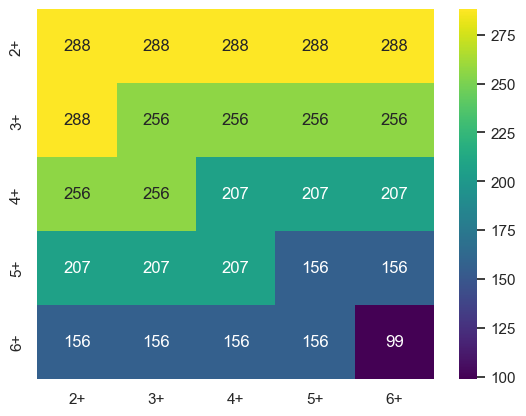

In [16]:
# Crie o mapa de calor
sns.heatmap(df.astype(int), fmt=".0f", annot=True, cmap='viridis')

In [21]:
def quadro(grouped_total3):
    # Cria uma nova coluna 'par' que contém os pares de origem-destino
    # grouped_total['par'] = list(zip(grouped_total['grid_origem'], grouped_total['grid_destino']))
    
    # Cria uma nova coluna 'contagem' que conta o número de vezes que cada par aparece para cada 'VehId' no DataFrame
    # grouped_total['contagem'] = grouped_total.groupby(['VehId_x', 'freq'])['freq'].transform('count') 
    # 'contagem' equivale à coluna somatório, que foi utilizada mais para filtrar os dados que pelo seu conteúdo em si.
    
    # Cria um novo DataFrame para armazenar os resultados
    df = pd.DataFrame(index=['2+', '3+', '4+', '5+', '6+'], columns=['2+', '3+', '4+', '5+', '6+'])
    
    # Cria um dicionário para armazenar os VehId para cada condição
    id_dict = {}
    
    # Preenche o DataFrame com os somatórios para cada categoria
    for i in df.index:
        for j in df.columns:
            # Filtra as linhas que satisfazem a condição atual
            if i == '2+' and j == '2+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 2) & (grouped_total3['repetições'] >= 2)]  # 2 ou mais rotas que se repetem 2 ou mais vezes para cada veículo.
            elif i == '3+' and j == '3+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 3) & (grouped_total3['repetições'] >= 3)]
            elif i == '4+' and j == '4+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 4) & (grouped_total3['repetições'] >= 4)]
            elif i == '5+' and j == '5+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 5) & (grouped_total3['repetições'] >= 5)]
            elif i == '6+' and j == '6+':
                rotas_condicao = grouped_total3[(grouped_total3['existem_rep'] >= 6) & (grouped_total3['repetições'] >= 6)]
            
            # Calcula o número de usuários únicos para a condição atual e adiciona ao DataFrame
            num_usuarios = rotas_condicao['VehId'].nunique()
            df.at[i, j] = num_usuarios
            
            # Armazena os ids dos veículos
            id_dict[('vehid', i, j)] = rotas_condicao['VehId'].unique().tolist()
            # id_dict[('Trip2', i, j)] = rotas_condicao['Trip'].unique().tolist() 
    
    # Converte o dicionário em um DataFrame, se necessário
    # id_df = pd.DataFrame.from_dict(id_dict, orient='index')

    return id_dict

In [27]:
df = quadro(grouped_total3)

last_list = list(df.values())[-1]
print(last_list)

[12, 128, 133, 135, 140, 145, 155, 156, 180, 181, 184, 185, 200, 201, 202, 203, 205, 208, 213, 218, 220, 223, 228, 231, 232, 242, 249, 250, 251, 258, 259, 265, 266, 267, 273, 275, 276, 278, 282, 283, 285, 292, 301, 303, 304, 307, 308, 309, 311, 323, 340, 346, 347, 356, 359, 366, 367, 371, 372, 382, 384, 385, 388, 389, 450, 452, 457, 459, 463, 465, 476, 480, 488, 490, 494, 507, 519, 521, 529, 530, 531, 538, 540, 546, 547, 557, 560, 561, 564, 565, 575, 577, 581, 584, 591, 592, 595, 597, 603]


In [30]:
df = pd.DataFrame(last_list, columns=["values"])
print(df)

    values
0       12
1      128
2      133
3      135
4      140
..     ...
94     591
95     592
96     595
97     597
98     603

[99 rows x 1 columns]


In [31]:
df.to_csv('last_list.csv')

## FIM